In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from Project import Project

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from typing import List
import os
from pathlib import Path

from Scripts.datahandling.BenchmarkDataset import BenchmarkDataset
from Scripts.datahandling.Dataloader import Dataloader

In [114]:
def normalize(X: np.array, varAxis: int = 1) -> np.array:
    '''
    varAxis 
    '''
    return (X - np.mean(X, axis = 0))/np.std(X, axis = 0) if varAxis == 1 else (X - np.mean(X, axis = 1))/np.std(X, axis = 1)

def referenceSignal(f: float, Nh: int, Fs: int, N: int) -> np.array:
    '''
    f: reference frequency
    Nh: number of harmonics
    Fs: sampling rate
    N: number of time samples
    '''
    t = np.asarray(range(1, N + 1))/Fs
    return np.vstack(np.asarray([[np.sin(2*np.pi*Ni*f*t), np.cos(2*np.pi*Ni*f*t)] for Ni in range(1, Nh + 1)]))

In [139]:
Y = np.vstack([referenceSignal(f, 2, 250, 500) for f in np.arange(8, 15.8 + 0.2, 0.2)]).T
Y = normalize(Y)

ca = CCA(n_components = 64, max_iter = 2000)

base_path = Project.tsinghua_raw_dir / 'benchmark' / 'separated_500'
outp_path = Project.tsinghua_cca_dir / 'benchmark' / 'separated_500'

In [3]:
%run CCA.py

2021-04-07 17:12:24,621	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265
2021-04-07 20:20:50,802	ERROR import_thread.py:89 -- ImportThread: Error while reading from socket: (10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)
2021-04-07 20:20:50,810	ERROR worker.py:1109 -- listen_error_messages_raylet: Error while reading from socket: (10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)
2021-04-07 20:20:50,813	ERROR worker.py:919 -- print_logs: Error while reading from socket: (10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)


***

In [5]:
batch_size = 128
signal_length = 500
dataset = BenchmarkDataset(Project, signal_length, classes = list(range(1, 5 + 1)))
dataloaders, dataset_sizes = Dataloader(dataset, batch_size)
print(dataset_sizes)

{'train': 2448, 'val': 612}


In [13]:
X.shape

torch.Size([128, 1, 64, 500])

In [110]:
X = next(iter(dataloaders['train']))
c = X[1][0]
X = X[0][0][0].T.numpy()
print("Class {}".format(c))
X

Class 1


array([[ 0.9868207 ,  1.4781415 ,  1.0192634 , ...,  1.4819189 ,
         1.4032617 ,  1.393943  ],
       [ 0.13118349,  0.95617086,  1.0377126 , ...,  1.416541  ,
         1.2791611 ,  1.2478939 ],
       [-1.3341453 ,  0.6450123 ,  1.1037718 , ...,  2.194237  ,
         1.5917574 ,  1.5388719 ],
       ...,
       [ 0.89910406,  2.3686392 ,  1.8887444 , ..., -0.46052015,
         0.22086196,  0.18485825],
       [ 2.1842327 ,  3.340829  ,  3.265431  , ..., -0.05615536,
         0.6844393 ,  0.81430537],
       [ 0.4785868 ,  2.7163243 ,  2.214498  , ..., -0.3532668 ,
         0.34433475,  0.3519707 ]], dtype=float32)

In [111]:
X.shape

(500, 64)

In [84]:
from CCA import stimulus, referenceSignal, normalize

In [33]:
from sklearn.cross_decomposition import CCA

In [59]:
import seaborn as sns

In [96]:
frequency = np.array([8. ,  8.2,  8.4, 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8])
phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
                   3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
                   0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

<AxesSubplot:>

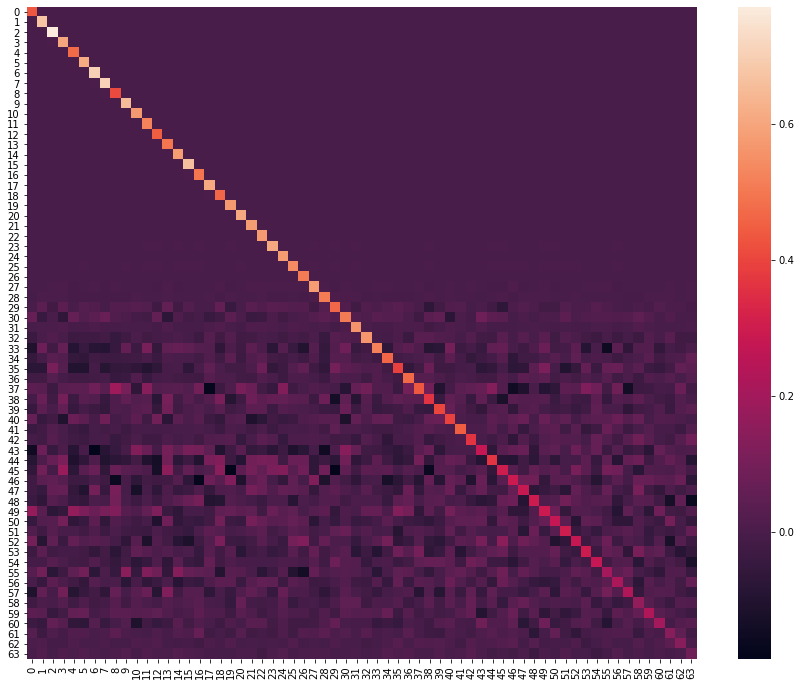

In [176]:
Y = np.vstack([referenceSignal(f, 2, 250, 500) for f in np.arange(8, 15.8 + 0.2, 0.2)]).T
ca = CCA(n_components = 64)
ca.fit(X, Y)
X_c, Y_c = ca.transform(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
R = np.corrcoef(X_c, Y_c, rowvar = False)
sns.heatmap(R[:64, 64:])

<AxesSubplot:>

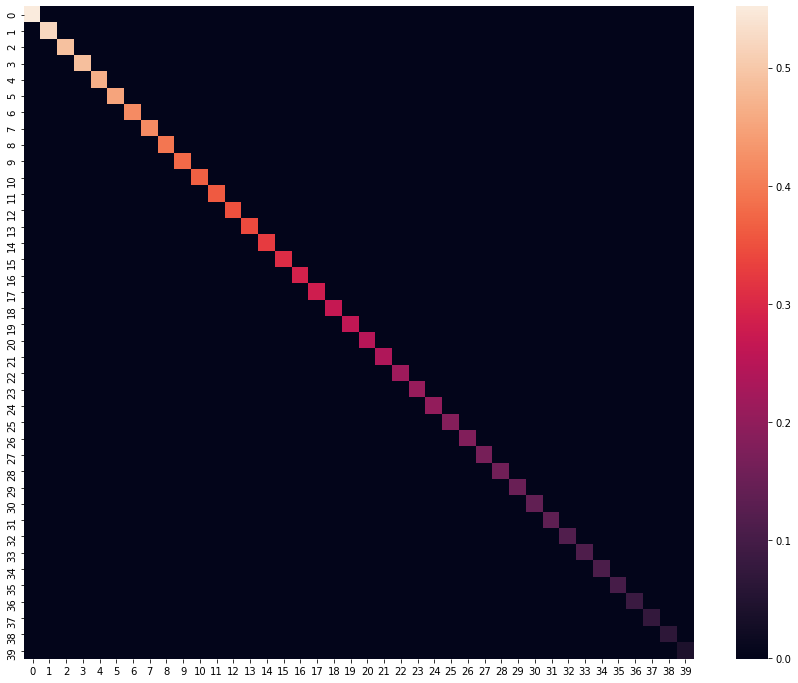

In [177]:
Y = np.array([stimulus(f, phi, 500) for f, phi in zip([8 + (k - 1)*0.2 for k in range(1, 40 + 1)], [0 + (k - 1)*0.5*np.pi for k in range(1, 40 + 1)])]).T
ca = CCA(n_components = 40)
ca.fit(X, Y)
X_c, Y_c = ca.transform(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
R = np.corrcoef(X_c, Y_c, rowvar = False)
# sns.heatmap(R[:64, 64:])
sns.heatmap(R[:40, 40:])

<AxesSubplot:>

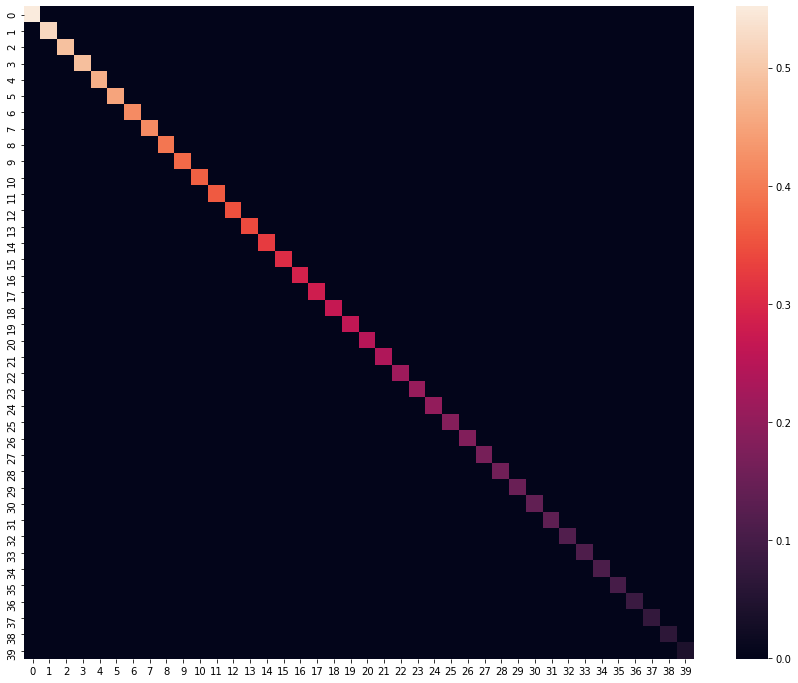

In [178]:
Y = np.array([stimulus(f, phi, 500) for f, phi in zip(frequency, phases)]).T
ca = CCA(n_components = 40)
ca.fit(X, Y)
X_c, Y_c = ca.transform(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
R = np.corrcoef(X_c, Y_c, rowvar = False)
# sns.heatmap(R[:64, 64:])
sns.heatmap(R[:40, 40:])